In [97]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score
import pickle
from sklearn.model_selection import cross_val_score
%matplotlib inline




Importing dataset

In [98]:
df = pd.read_csv(r"/kaggle/input/electric-vehicle-population/Electric_Vehicle_Population.csv")
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,3MW5P9J05N,Arapahoe,Englewood,CO,80111.0,2022,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,22,0,NaN,200589147,POINT (-104.89239 39.61914),NaN,8.005007e+09
1,5YJXCBE27J,Island,Greenbank,WA,98253.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,10.0,326880081,POINT (-122.575569 48.08489),NaN,5.302997e+10
2,1N4AZ0CP3F,Kings,Lemoore,CA,93245.0,2015,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,0,NaN,182237457,POINT (-119.78637 36.30101),NaN,6.031980e+09
3,5YJ3E1EA8J,San Diego,Oceanside,CA,92051.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,NaN,153998050,NaN,NaN,6.073019e+09
4,5YJ3E1EB1K,Alameda,Berkeley,CA,94710.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,NaN,320914072,POINT (-122.300531 37.869271),NaN,6.001423e+09


In [99]:
df.shape

(109481, 17)

In [100]:
df.size

1861177

In [101]:
cols_to_use = ["VIN (1-10)", "City", "Model Year", "Make", "Electric Vehicle Type", "Clean Alternative Fuel Vehicle (CAFV) Eligibility", "Electric Range"]
df = df[cols_to_use]
df.head()

,VIN (1-10),City,Model Year,Make,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range
0,3MW5P9J05N,Englewood,2022,BMW,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,22
1,5YJXCBE27J,Greenbank,2018,TESLA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238
2,1N4AZ0CP3F,Lemoore,2015,NISSAN,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84
3,5YJ3E1EA8J,Oceanside,2018,TESLA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215
4,5YJ3E1EB1K,Berkeley,2019,TESLA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109481 entries, 0 to 109480
Data columns (total 7 columns):
 #   Column                                             Non-Null Count   Dtype 
---  ------                                             --------------   ----- 
 0   VIN (1-10)                                         109481 non-null  object
 1   City                                               109480 non-null  object
 2   Model Year                                         109481 non-null  int64 
 3   Make                                               109481 non-null  object
 4   Electric Vehicle Type                              109481 non-null  object
 5   Clean Alternative Fuel Vehicle (CAFV) Eligibility  109481 non-null  object
 6   Electric Range                                     109481 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 5.8+ MB


In [103]:
df.describe()

,Model Year,Electric Range
count,109481.000000,109481.000000
mean,2018.899197,90.211425
std,2.872853,102.575715
min,1997.000000,0.000000
25%,2017.000000,0.000000
50%,2019.000000,35.000000
75%,2021.000000,208.000000
max,2023.000000,337.000000


In [104]:
df[cols_to_use].nunique()

VIN (1-10)                                           7378
City                                                  621
Model Year                                             20
Make                                                   34
Electric Vehicle Type                                   2
Clean Alternative Fuel Vehicle (CAFV) Eligibility       3
Electric Range                                        101
dtype: int64

In [105]:
df.duplicated().sum()

44769

In [106]:
df.drop_duplicates(inplace = True)
df.duplicated().sum()

0

In [107]:
df.shape

(64712, 7)

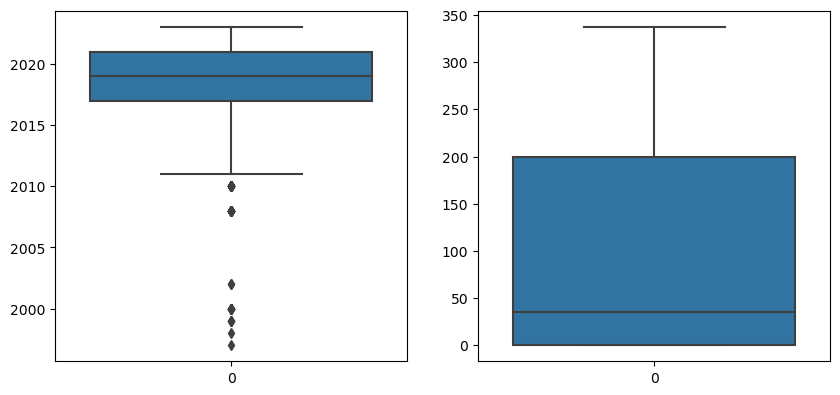

In [108]:
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
sns.boxplot(df["Model Year"])
plt.subplot(2,2,2)
sns.boxplot(df["Electric Range"])
plt.show()


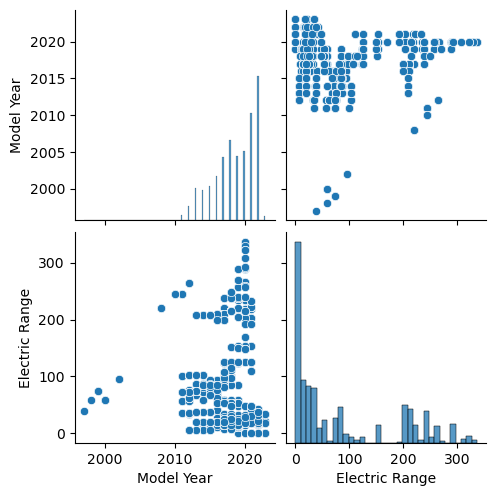

In [109]:
sns.pairplot(df)
plt.show()

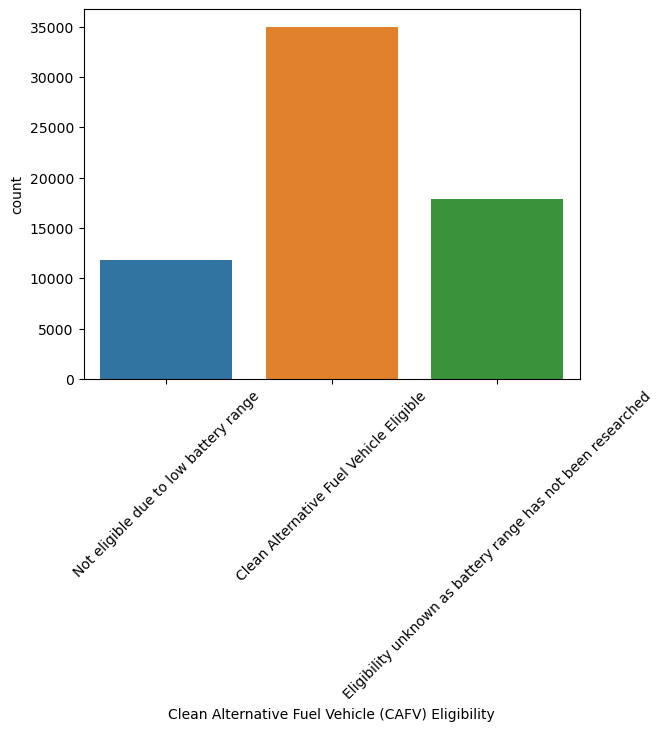

In [110]:
sns.countplot(data = df, x = "Clean Alternative Fuel Vehicle (CAFV) Eligibility")
plt.xticks(rotation = 45)
plt.show()

the maximum vehicles are from the class of clean alternative fuel vehicle 

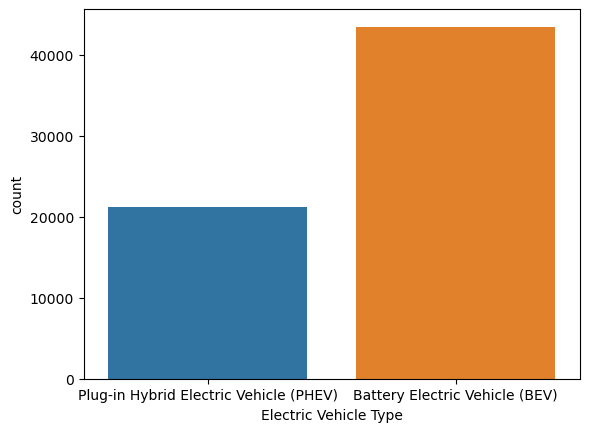

In [111]:
sns.countplot(data = df, x = "Electric Vehicle Type")
plt.show()

in electric vehicle type, more than 40k vehicles are battery electric vehicle (BEV) and around 20K are plug-in hybrid electric vehicle(PHEV)

**ENCODING**

In [112]:
le = LabelEncoder()
df["Electric Vehicle Type"] = le.fit_transform(df["Electric Vehicle Type"])
df["Clean Alternative Fuel Vehicle (CAFV) Eligibility"] = le.fit_transform(df["Clean Alternative Fuel Vehicle (CAFV) Eligibility"])


In [113]:
ohe = pd.get_dummies(df, columns = ["Make"])
ohe.head()

,VIN (1-10),City,Model Year,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Make_AUDI,Make_AZURE DYNAMICS,Make_BENTLEY,Make_BMW,...,Make_POLESTAR,Make_PORSCHE,Make_RIVIAN,Make_SMART,Make_SUBARU,Make_TESLA,Make_TH!NK,Make_TOYOTA,Make_VOLKSWAGEN,Make_VOLVO
0,3MW5P9J05N,Englewood,2022,1,2,22,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,5YJXCBE27J,Greenbank,2018,0,0,238,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1N4AZ0CP3F,Lemoore,2015,0,0,84,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5YJ3E1EA8J,Oceanside,2018,0,0,215,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,5YJ3E1EB1K,Berkeley,2019,0,0,220,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [114]:
df = ohe

In [115]:
df.drop(["VIN (1-10)","City"], axis = 1, inplace = True)
df.head()

,Model Year,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Make_AUDI,Make_AZURE DYNAMICS,Make_BENTLEY,Make_BMW,Make_CADILLAC,Make_CHEVROLET,...,Make_POLESTAR,Make_PORSCHE,Make_RIVIAN,Make_SMART,Make_SUBARU,Make_TESLA,Make_TH!NK,Make_TOYOTA,Make_VOLKSWAGEN,Make_VOLVO
0,2022,1,2,22,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2018,0,0,238,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,2015,0,0,84,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2018,0,0,215,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,2019,0,0,220,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [116]:
df.shape

(64712, 38)

**CORRELATION**

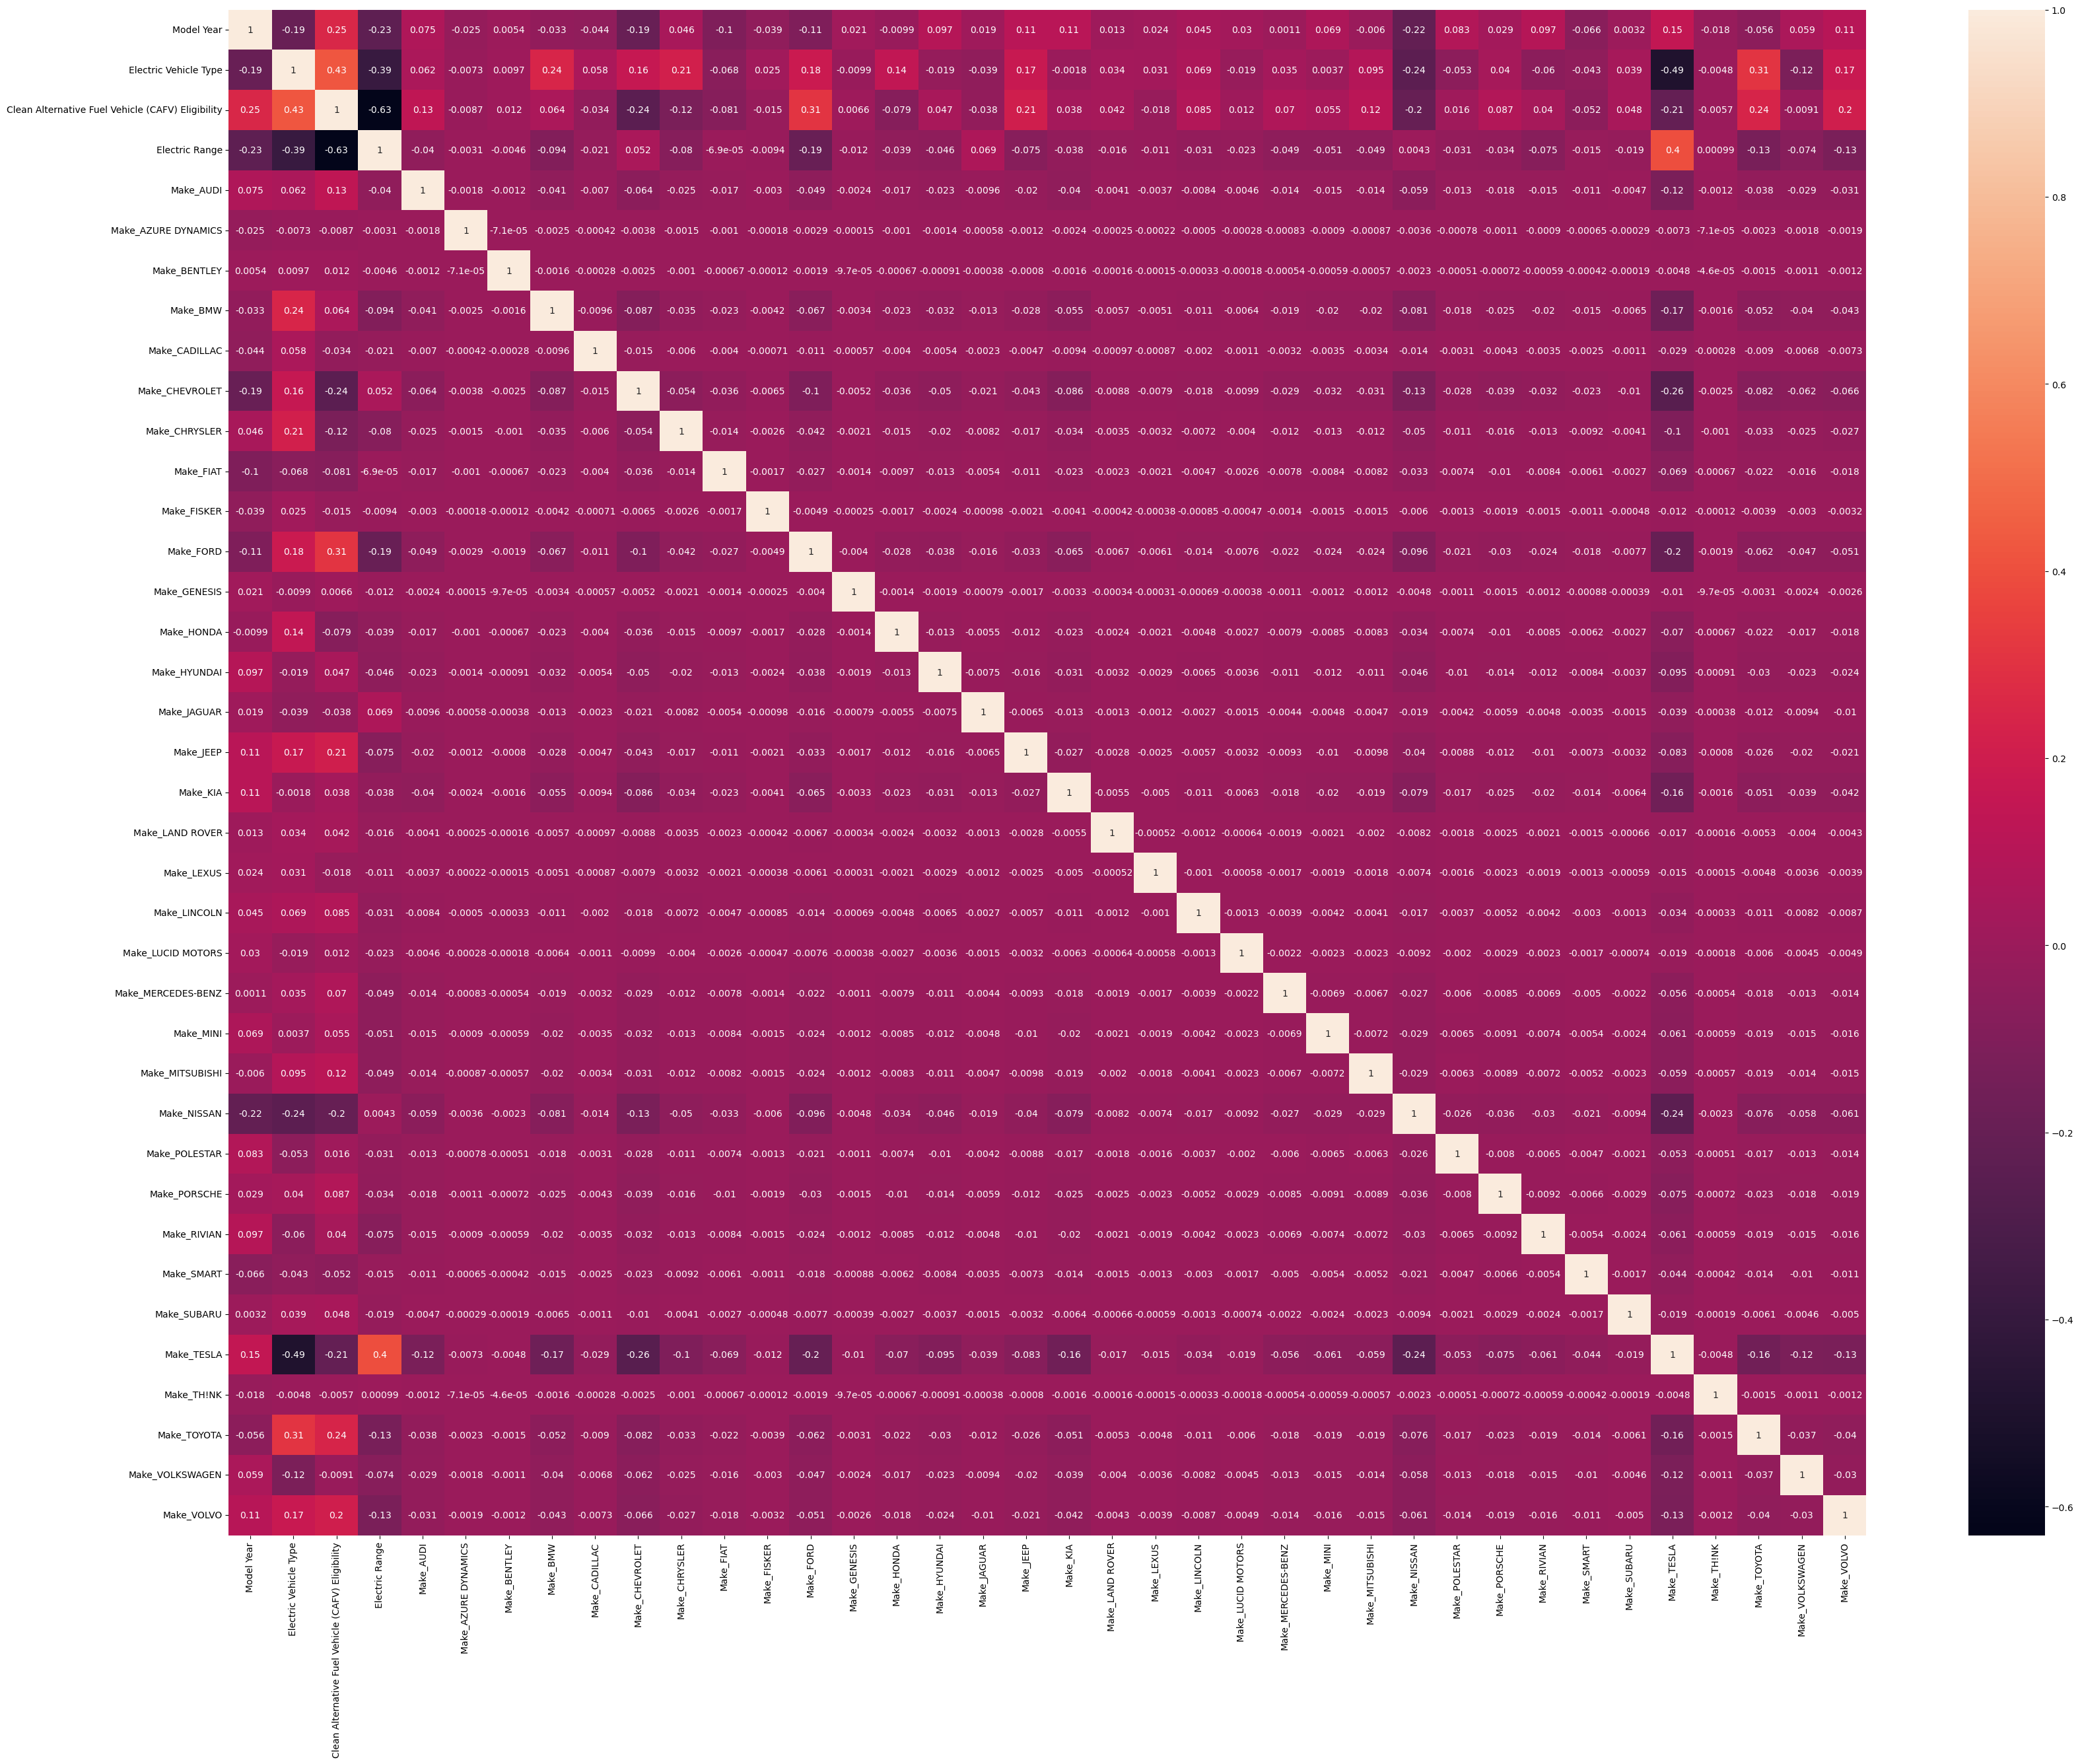

In [117]:
plt.figure(figsize = (40,30))
sns.heatmap(df.corr(), annot = True)
plt.show()

**TRAIN TEST SPILT FOR ELECTRIC VEHICLE TYPE**

In [118]:
x = df.drop("Electric Vehicle Type", axis=1)
y = df["Electric Vehicle Type"]
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7,random_state = 42)

In [119]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [120]:
x_train.shape

(45298, 37)

this is the 70% of the data i.e. 64712

In [121]:
x_test.shape

(19414, 37)

this the 30% of the data

**MODEL BUILDING**

1. DECISION TREE

In [122]:
dtc = DecisionTreeClassifier(criterion = 'gini', max_depth = 7, random_state = 0)
dtc.fit(x_train,y_train)


DecisionTreeClassifier(max_depth=7, random_state=0)

In [123]:
y_pred = dtc.predict(x_test)

In [124]:
print(accuracy_score(y_test,y_pred)*100)

99.96909446790976


2. KNN

In [126]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)


In [127]:
print(accuracy_score(y_test,y_pred)*100)

99.97939631193984


3. SUPPORT VECTOR MACHINE

In [128]:
svm = SVC(kernel = 'linear')
svm.fit(x_train,y_train)
y_pred = svm.predict(x_test)

In [129]:
print(accuracy_score(y_test,y_pred)*100)

94.31853301741012


4. RANDOM FOREST

In [131]:
rfc = RandomForestClassifier(criterion = 'entropy')
rfc.fit(x_train,y_train)
y_pred = rfc.predict(x_test)

In [132]:
print(accuracy_score(y_test,y_pred)*100)

99.97939631193984


5. LOGISTIC REGRESSION

In [133]:
lreg = LogisticRegression()
lreg.fit(x_train,y_train)
y_pred = lreg.predict(x_test)

In [134]:
print(accuracy_score(y_test,y_pred)*100)

93.42227258679303


6. ADABOOST

In [135]:
ada = AdaBoostClassifier()
ada.fit(x_train,y_train)
y_pred = ada.predict(x_test)

In [136]:
print(accuracy_score(y_test,y_pred)*100)

99.96909446790976


*Accuracy of different models are as follows-
1. decision tree - 99.96%
2. KNN - 99.97%
3. SVM - 94.31%
4. Random Forest - 99.97%
5. Logistic regression - 93.42
6. AdaBoost - 99.96%*

**CONFUSION MATRIX**

In [146]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[13086     4]
 [    2  6322]]


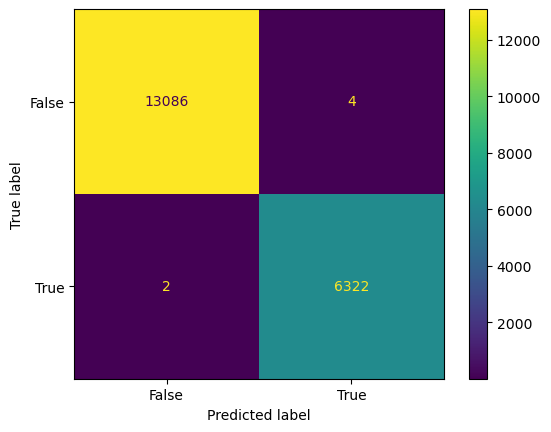

In [145]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix (y_test,y_pred)
cm_display = metrics.ConfusionMatrixDisplay (confusion_matrix = confusion_matrix, display_labels= [False, True])
cm_display.plot()
plt.show()

Here we can see the highest accuracy is of Random forest i.e. 99.97%

cross validation score

In [149]:
scores = cross_val_score(rfc,x,y, cv = 5)
print('Accuracy: %0.2f (+/- %0.2f)' %(scores.mean(),scores.std()*2))

Accuracy: 1.00 (+/- 0.00)


after all these computations we can conclude that random forest classifier has the highest accuracy which we have also varified using cross validation score


In [147]:
df.head()

,Model Year,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Make_AUDI,Make_AZURE DYNAMICS,Make_BENTLEY,Make_BMW,Make_CADILLAC,Make_CHEVROLET,...,Make_POLESTAR,Make_PORSCHE,Make_RIVIAN,Make_SMART,Make_SUBARU,Make_TESLA,Make_TH!NK,Make_TOYOTA,Make_VOLKSWAGEN,Make_VOLVO
0,2022,1,2,22,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2018,0,0,238,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,2015,0,0,84,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2018,0,0,215,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,2019,0,0,220,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


**TRAIN TEST SPLIT FOR CLEAN ALTERNATIVE FUEL VEHICLE**